In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data=pd.read_csv("churn.csv")
df=data.copy()
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [3]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [6]:
df.shape

(3333, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [8]:
df_num=df.select_dtypes(include=["int64","float64"])
df_num.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [9]:
df_cat=df.select_dtypes(include=["object","bool"])
df_cat.head()

,state,phone number,international plan,voice mail plan,churn
0,KS,382-4657,no,yes,False
1,OH,371-7191,no,yes,False
2,NJ,358-1921,no,no,False
3,OH,375-9999,yes,no,False
4,OK,330-6626,yes,no,False


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [20]:
df["state"].value_counts().count()

51

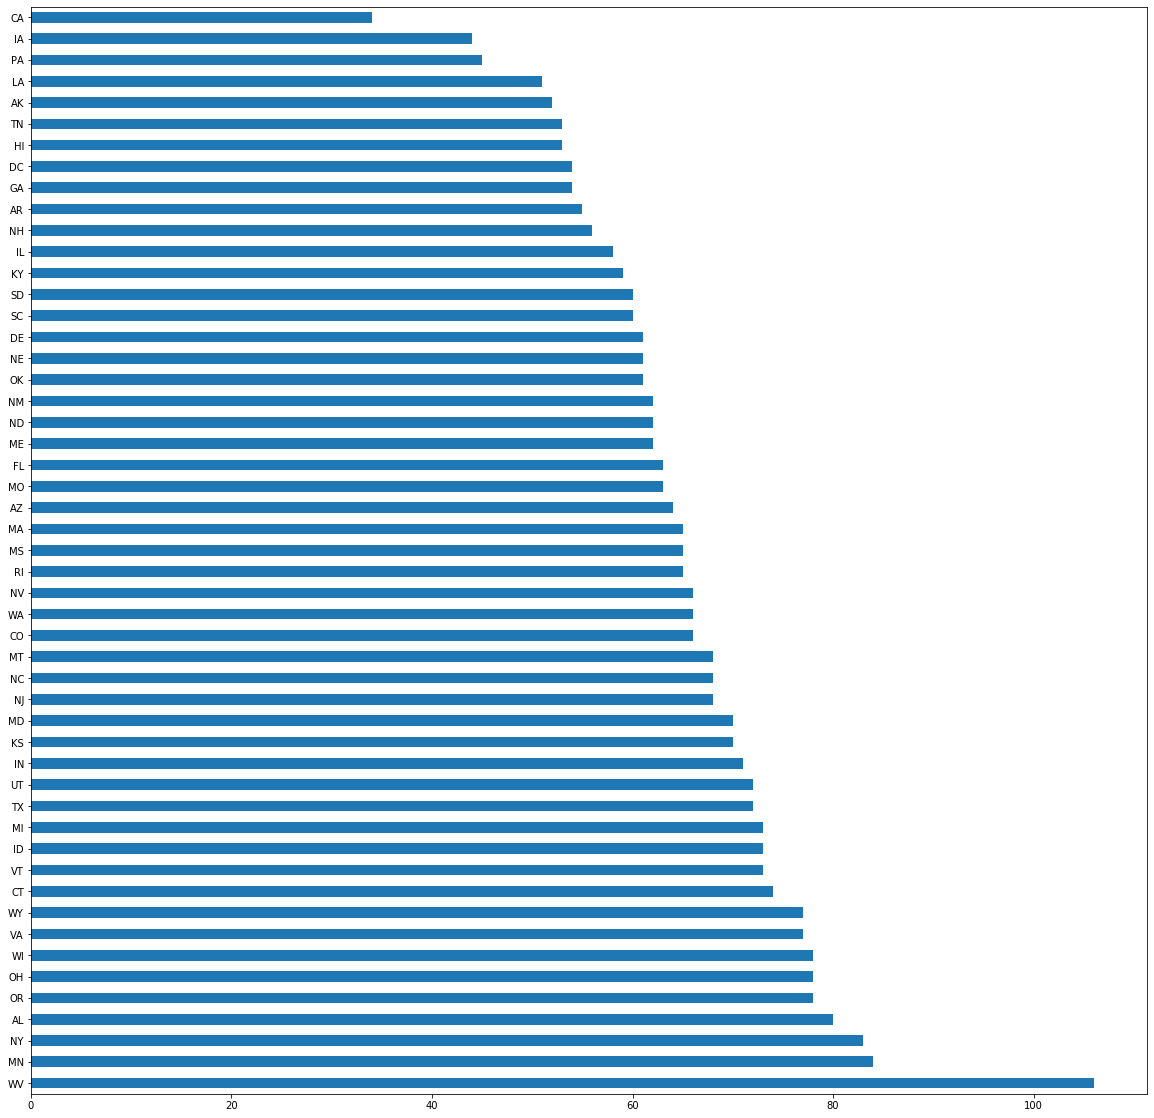

In [23]:
plt.subplots(figsize=(20,20))
df["state"].value_counts().plot.barh()

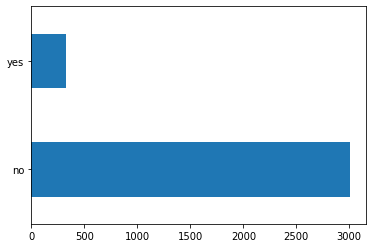

In [24]:
df["international plan"].value_counts().plot.barh()

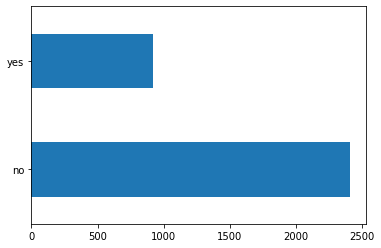

In [25]:
df["voice mail plan"].value_counts().plot.barh()

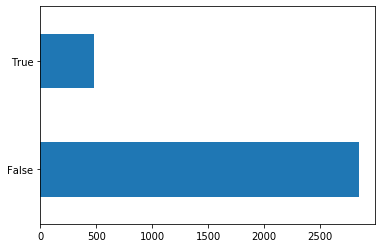

In [26]:
df["churn"].value_counts().plot.barh()

In [31]:
df[df["churn"]==True].shape

(483, 21)

In [32]:
df[df["churn"]==True]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,...,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,393-7984,no,no,0,62.4,89,10.61,...,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,360-1596,no,no,0,249.6,118,42.43,...,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,383-6029,yes,yes,41,173.1,85,29.43,...,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True
48,ID,119,415,398-1294,no,no,0,159.1,114,27.05,...,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True
54,WY,87,415,353-3759,no,no,0,151.0,83,25.67,...,116,18.67,203.9,127,9.18,9.7,3,2.62,5,True
57,CO,121,408,370-7574,no,yes,30,198.4,129,33.73,...,77,6.40,181.2,77,8.15,5.8,3,1.57,3,True
69,TX,150,510,374-8042,no,no,0,178.9,101,30.41,...,110,14.37,148.6,100,6.69,13.8,3,3.73,4,True
76,DC,82,415,374-5353,no,no,0,300.3,109,51.05,...,100,15.39,270.1,73,12.15,11.7,4,3.16,0,True


In [33]:
df[df["churn"]==True].head(20)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,...,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,393-7984,no,no,0,62.4,89,10.61,...,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,360-1596,no,no,0,249.6,118,42.43,...,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,383-6029,yes,yes,41,173.1,85,29.43,...,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True
48,ID,119,415,398-1294,no,no,0,159.1,114,27.05,...,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True
54,WY,87,415,353-3759,no,no,0,151.0,83,25.67,...,116,18.67,203.9,127,9.18,9.7,3,2.62,5,True
57,CO,121,408,370-7574,no,yes,30,198.4,129,33.73,...,77,6.40,181.2,77,8.15,5.8,3,1.57,3,True
69,TX,150,510,374-8042,no,no,0,178.9,101,30.41,...,110,14.37,148.6,100,6.69,13.8,3,3.73,4,True
76,DC,82,415,374-5353,no,no,0,300.3,109,51.05,...,100,15.39,270.1,73,12.15,11.7,4,3.16,0,True


In [34]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

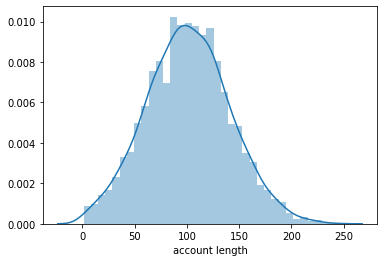

In [45]:
sns.distplot(df["account length"])

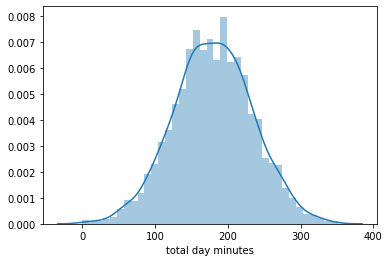

In [46]:
sns.distplot(df["total day minutes"])

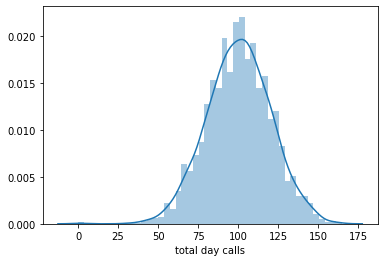

In [47]:
sns.distplot(df["total day calls"])

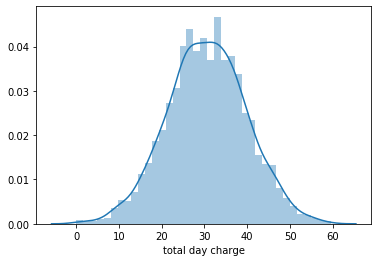

In [48]:
sns.distplot(df["total day charge"])

In [58]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

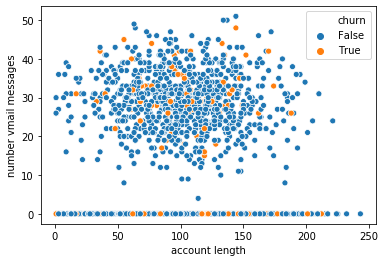

In [61]:
sns.scatterplot(x="account length", y="number vmail messages", hue="churn",data=df)

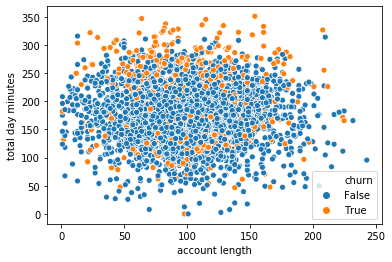

In [62]:
sns.scatterplot(x="account length", y="total day minutes", hue="churn",data=df)

In [68]:
df_num.columns

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

In [71]:
df_num_2=df_num.drop(["area code","number vmail messages","customer service calls"],axis=1)
df_num_2.head()

,account length,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge
0,128,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70
1,107,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70
2,137,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29
3,84,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78
4,75,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73


In [83]:
df.groupby("international plan")["total intl calls"].mean()

international plan
no     4.465449
yes    4.609907
Name: total intl calls, dtype: float64

In [84]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [3]:
df_c=df[df["churn"]==True]

In [4]:
df_c.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,...,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,393-7984,no,no,0,62.4,89,10.61,...,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,360-1596,no,no,0,249.6,118,42.43,...,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,383-6029,yes,yes,41,173.1,85,29.43,...,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True


In [5]:
print((df_c.shape[0]/df["churn"].shape[0])*100)

14.491449144914492


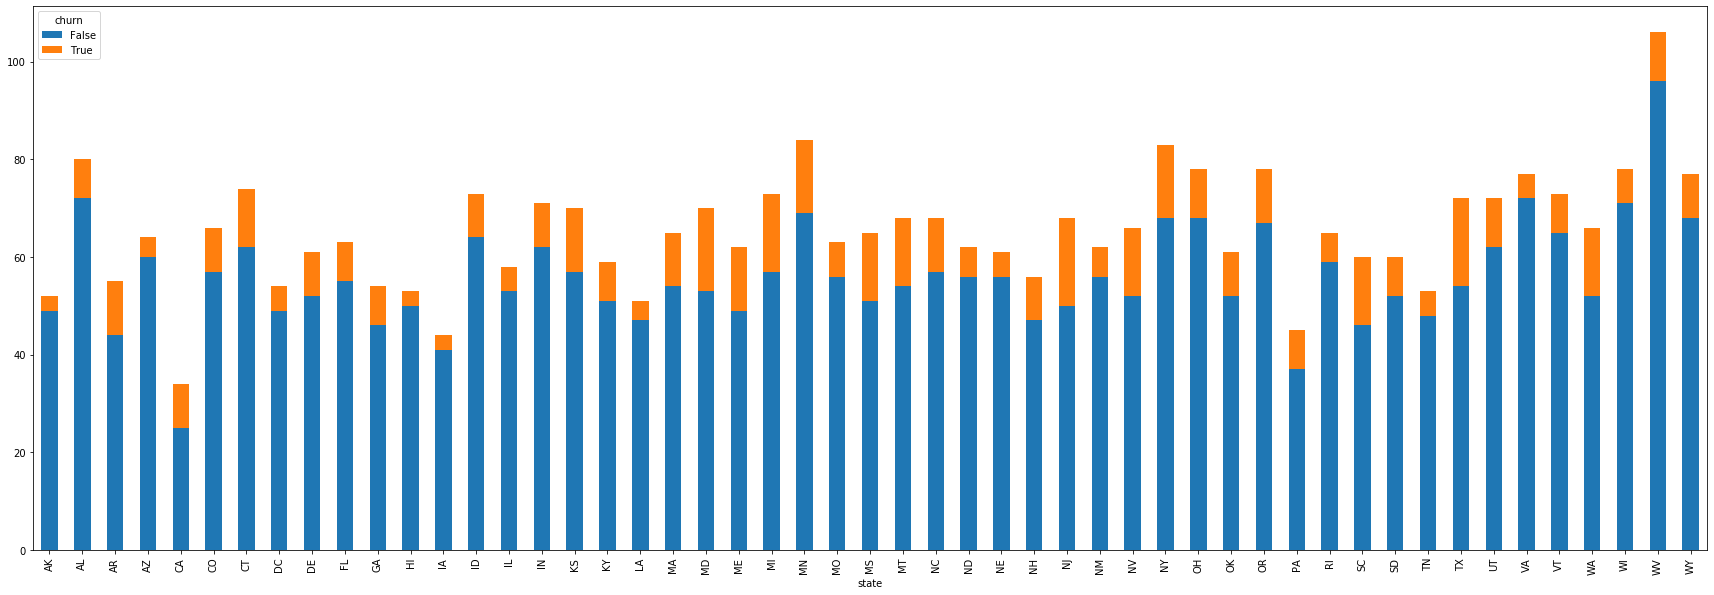

In [7]:
df.groupby(["state","churn"]).size().unstack().plot(kind="bar", stacked=True, figsize=(30,10))

In [24]:
df["state"].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [26]:
df[(df["state"]=="KS")&(df["churn"]==True)]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
258,KS,92,408,386-4170,yes,no,0,62.6,111,10.64,...,126,15.35,221.7,80,9.98,10.4,2,2.81,1,True
430,KS,46,510,365-5979,no,no,0,250.3,100,42.55,...,90,22.15,195.0,104,8.78,13.3,2,3.59,2,True
619,KS,110,415,383-1657,yes,no,0,293.3,79,49.86,...,90,16.02,266.9,91,12.01,14.5,4,3.92,0,True
987,KS,110,415,369-8024,yes,yes,27,267.9,103,45.54,...,74,22.38,178.1,106,8.01,8.3,2,2.24,1,True
1155,KS,167,415,409-4734,no,no,0,131.6,120,22.37,...,96,17.96,168.3,97,7.57,11.1,4,3.00,4,True
1232,KS,24,510,369-5449,no,no,0,243.0,91,41.31,...,77,15.63,184.3,109,8.29,15.3,6,4.13,0,True
1334,KS,126,408,379-8681,no,no,0,321.3,99,54.62,...,93,14.27,193.6,106,8.71,8.0,4,2.16,1,True
1593,KS,105,415,405-1108,yes,no,0,273.9,119,46.56,...,103,23.68,255.3,90,11.49,10.9,7,2.94,1,True
2059,KS,94,408,379-7215,no,no,0,269.2,104,45.76,...,144,16.47,257.6,61,11.59,8.9,2,2.40,3,True
2173,KS,47,510,418-5300,yes,no,0,47.8,120,8.13,...,123,15.21,152.6,96,6.87,13.3,7,3.59,0,True


In [37]:
ks_c=df[(df["state"]=="KS")&(df["churn"]==True)]

In [38]:
df[df["state"]=="KS"]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
179,KS,70,408,411-4582,no,no,0,232.1,122,39.46,...,112,24.85,201.2,112,9.05,0.0,0,0.00,3,False
258,KS,92,408,386-4170,yes,no,0,62.6,111,10.64,...,126,15.35,221.7,80,9.98,10.4,2,2.81,1,True
287,KS,137,408,352-8202,no,no,0,205.9,88,35.00,...,86,17.79,289.9,84,13.05,14.5,4,3.92,2,False
368,KS,132,415,369-3214,no,no,0,83.4,110,14.18,...,137,19.74,146.7,114,6.60,7.6,5,2.05,1,False
379,KS,127,415,345-2931,no,no,0,221.0,100,37.57,...,113,13.66,233.1,96,10.49,6.8,4,1.84,2,False
385,KS,137,415,346-8581,no,no,0,230.2,113,39.13,...,79,18.73,204.7,111,9.21,10.7,7,2.89,4,False
430,KS,46,510,365-5979,no,no,0,250.3,100,42.55,...,90,22.15,195.0,104,8.78,13.3,2,3.59,2,True
451,KS,86,408,339-2616,no,yes,23,225.5,107,38.34,...,105,20.94,245.7,81,11.06,9.8,2,2.65,0,False
508,KS,143,408,407-2081,no,yes,24,186.6,69,31.72,...,116,18.87,234.9,138,10.57,11.6,5,3.13,1,False


In [39]:
ks=df[df["state"]=="KS"]

In [119]:
df[df["state"]=="KS"].shape

(70, 21)

In [42]:
print((ks_c.shape[0]/ks.shape[0])*100)

18.571428571428573


In [73]:
df_c["state"].value_counts().count()

51

In [75]:
df.groupby("state")["churn"].sum()

state
AK     3.0
AL     8.0
AR    11.0
AZ     4.0
CA     9.0
CO     9.0
CT    12.0
DC     5.0
DE     9.0
FL     8.0
GA     8.0
HI     3.0
IA     3.0
ID     9.0
IL     5.0
IN     9.0
KS    13.0
KY     8.0
LA     4.0
MA    11.0
MD    17.0
ME    13.0
MI    16.0
MN    15.0
MO     7.0
MS    14.0
MT    14.0
NC    11.0
ND     6.0
NE     5.0
NH     9.0
NJ    18.0
NM     6.0
NV    14.0
NY    15.0
OH    10.0
OK     9.0
OR    11.0
PA     8.0
RI     6.0
SC    14.0
SD     8.0
TN     5.0
TX    18.0
UT    10.0
VA     5.0
VT     8.0
WA    14.0
WI     7.0
WV    10.0
WY     9.0
Name: churn, dtype: float64

In [77]:
a=df.groupby("state")["churn"].sum()

In [81]:
list(a)

[3.0,
 8.0,
 11.0,
 4.0,
 9.0,
 9.0,
 12.0,
 5.0,
 9.0,
 8.0,
 8.0,
 3.0,
 3.0,
 9.0,
 5.0,
 9.0,
 13.0,
 8.0,
 4.0,
 11.0,
 17.0,
 13.0,
 16.0,
 15.0,
 7.0,
 14.0,
 14.0,
 11.0,
 6.0,
 5.0,
 9.0,
 18.0,
 6.0,
 14.0,
 15.0,
 10.0,
 9.0,
 11.0,
 8.0,
 6.0,
 14.0,
 8.0,
 5.0,
 18.0,
 10.0,
 5.0,
 8.0,
 14.0,
 7.0,
 10.0,
 9.0]

In [137]:
df["state"].value_counts().sort_index()

AK     52
AL     80
AR     55
AZ     64
CA     34
CO     66
CT     74
DC     54
DE     61
FL     63
GA     54
HI     53
IA     44
ID     73
IL     58
IN     71
KS     70
KY     59
LA     51
MA     65
MD     70
ME     62
MI     73
MN     84
MO     63
MS     65
MT     68
NC     68
ND     62
NE     61
NH     56
NJ     68
NM     62
NV     66
NY     83
OH     78
OK     61
OR     78
PA     45
RI     65
SC     60
SD     60
TN     53
TX     72
UT     72
VA     77
VT     73
WA     66
WI     78
WV    106
WY     77
Name: state, dtype: int64

In [138]:
c=df["state"].value_counts().sort_index()

In [139]:
c

AK     52
AL     80
AR     55
AZ     64
CA     34
CO     66
CT     74
DC     54
DE     61
FL     63
GA     54
HI     53
IA     44
ID     73
IL     58
IN     71
KS     70
KY     59
LA     51
MA     65
MD     70
ME     62
MI     73
MN     84
MO     63
MS     65
MT     68
NC     68
ND     62
NE     61
NH     56
NJ     68
NM     62
NV     66
NY     83
OH     78
OK     61
OR     78
PA     45
RI     65
SC     60
SD     60
TN     53
TX     72
UT     72
VA     77
VT     73
WA     66
WI     78
WV    106
WY     77
Name: state, dtype: int64

In [140]:
list(c)

[52,
 80,
 55,
 64,
 34,
 66,
 74,
 54,
 61,
 63,
 54,
 53,
 44,
 73,
 58,
 71,
 70,
 59,
 51,
 65,
 70,
 62,
 73,
 84,
 63,
 65,
 68,
 68,
 62,
 61,
 56,
 68,
 62,
 66,
 83,
 78,
 61,
 78,
 45,
 65,
 60,
 60,
 53,
 72,
 72,
 77,
 73,
 66,
 78,
 106,
 77]

In [142]:
n= df_c["state"].unique()

In [143]:
list(n)

['IN',
 'NY',
 'CO',
 'AZ',
 'MD',
 'ID',
 'WY',
 'TX',
 'DC',
 'NJ',
 'LA',
 'MS',
 'ME',
 'NV',
 'VT',
 'OH',
 'AK',
 'FL',
 'MN',
 'VA',
 'OR',
 'KS',
 'SD',
 'OK',
 'CT',
 'RI',
 'MT',
 'AL',
 'GA',
 'CA',
 'MO',
 'WI',
 'DE',
 'MA',
 'WV',
 'MI',
 'SC',
 'NC',
 'UT',
 'KY',
 'PA',
 'NE',
 'AR',
 'NM',
 'IL',
 'TN',
 'WA',
 'IA',
 'NH',
 'HI',
 'ND']

In [144]:
n.sort()

In [145]:
n

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [91]:
for i in b:
    print((b-a)*100)

AK    4900.0
AL    7200.0
AR    4400.0
AZ    6000.0
CA    2500.0
CO    5700.0
CT    6200.0
DC    4900.0
DE    5200.0
FL    5500.0
GA    4600.0
HI    5000.0
IA    4100.0
ID    6400.0
IL    5300.0
IN    6200.0
KS    5700.0
KY    5100.0
LA    4700.0
MA    5400.0
MD    5300.0
ME    4900.0
MI    5700.0
MN    6900.0
MO    5600.0
MS    5100.0
MT    5400.0
NC    5700.0
ND    5600.0
NE    5600.0
NH    4700.0
NJ    5000.0
NM    5600.0
NV    5200.0
NY    6800.0
OH    6800.0
OK    5200.0
OR    6700.0
PA    3700.0
RI    5900.0
SC    4600.0
SD    5200.0
TN    4800.0
TX    5400.0
UT    6200.0
VA    7200.0
VT    6500.0
WA    5200.0
WI    7100.0
WV    9600.0
WY    6800.0
dtype: float64
AK    4900.0
AL    7200.0
AR    4400.0
AZ    6000.0
CA    2500.0
CO    5700.0
CT    6200.0
DC    4900.0
DE    5200.0
FL    5500.0
GA    4600.0
HI    5000.0
IA    4100.0
ID    6400.0
IL    5300.0
IN    6200.0
KS    5700.0
KY    5100.0
LA    4700.0
MA    5400.0
MD    5300.0
ME    4900.0
MI    5700.0
MN    6900.0
MO    5600

In [146]:
c_df=pd.DataFrame([n,a,c])
c_df.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1,3,8,11,4,9,9,12,5,9,8,...,8,5,18,10,5,8,14,7,10,9
2,52,80,55,64,34,66,74,54,61,63,...,60,53,72,72,77,73,66,78,106,77


In [149]:
c_df=c_df.T

In [150]:
c_df.columns=["state","n_churn","churn"]
c_df.head()

,state,n_churn,churn
0,AK,3,52
1,AL,8,80
2,AR,11,55
3,AZ,4,64
4,CA,9,34


In [153]:
c_df["churn_ratio"]=(c_df.n_churn/c_df.churn)*100
c_df.head()

,state,n_churn,churn,churn_ratio
0,AK,3,52,5.76923
1,AL,8,80,10
2,AR,11,55,20
3,AZ,4,64,6.25
4,CA,9,34,26.4706


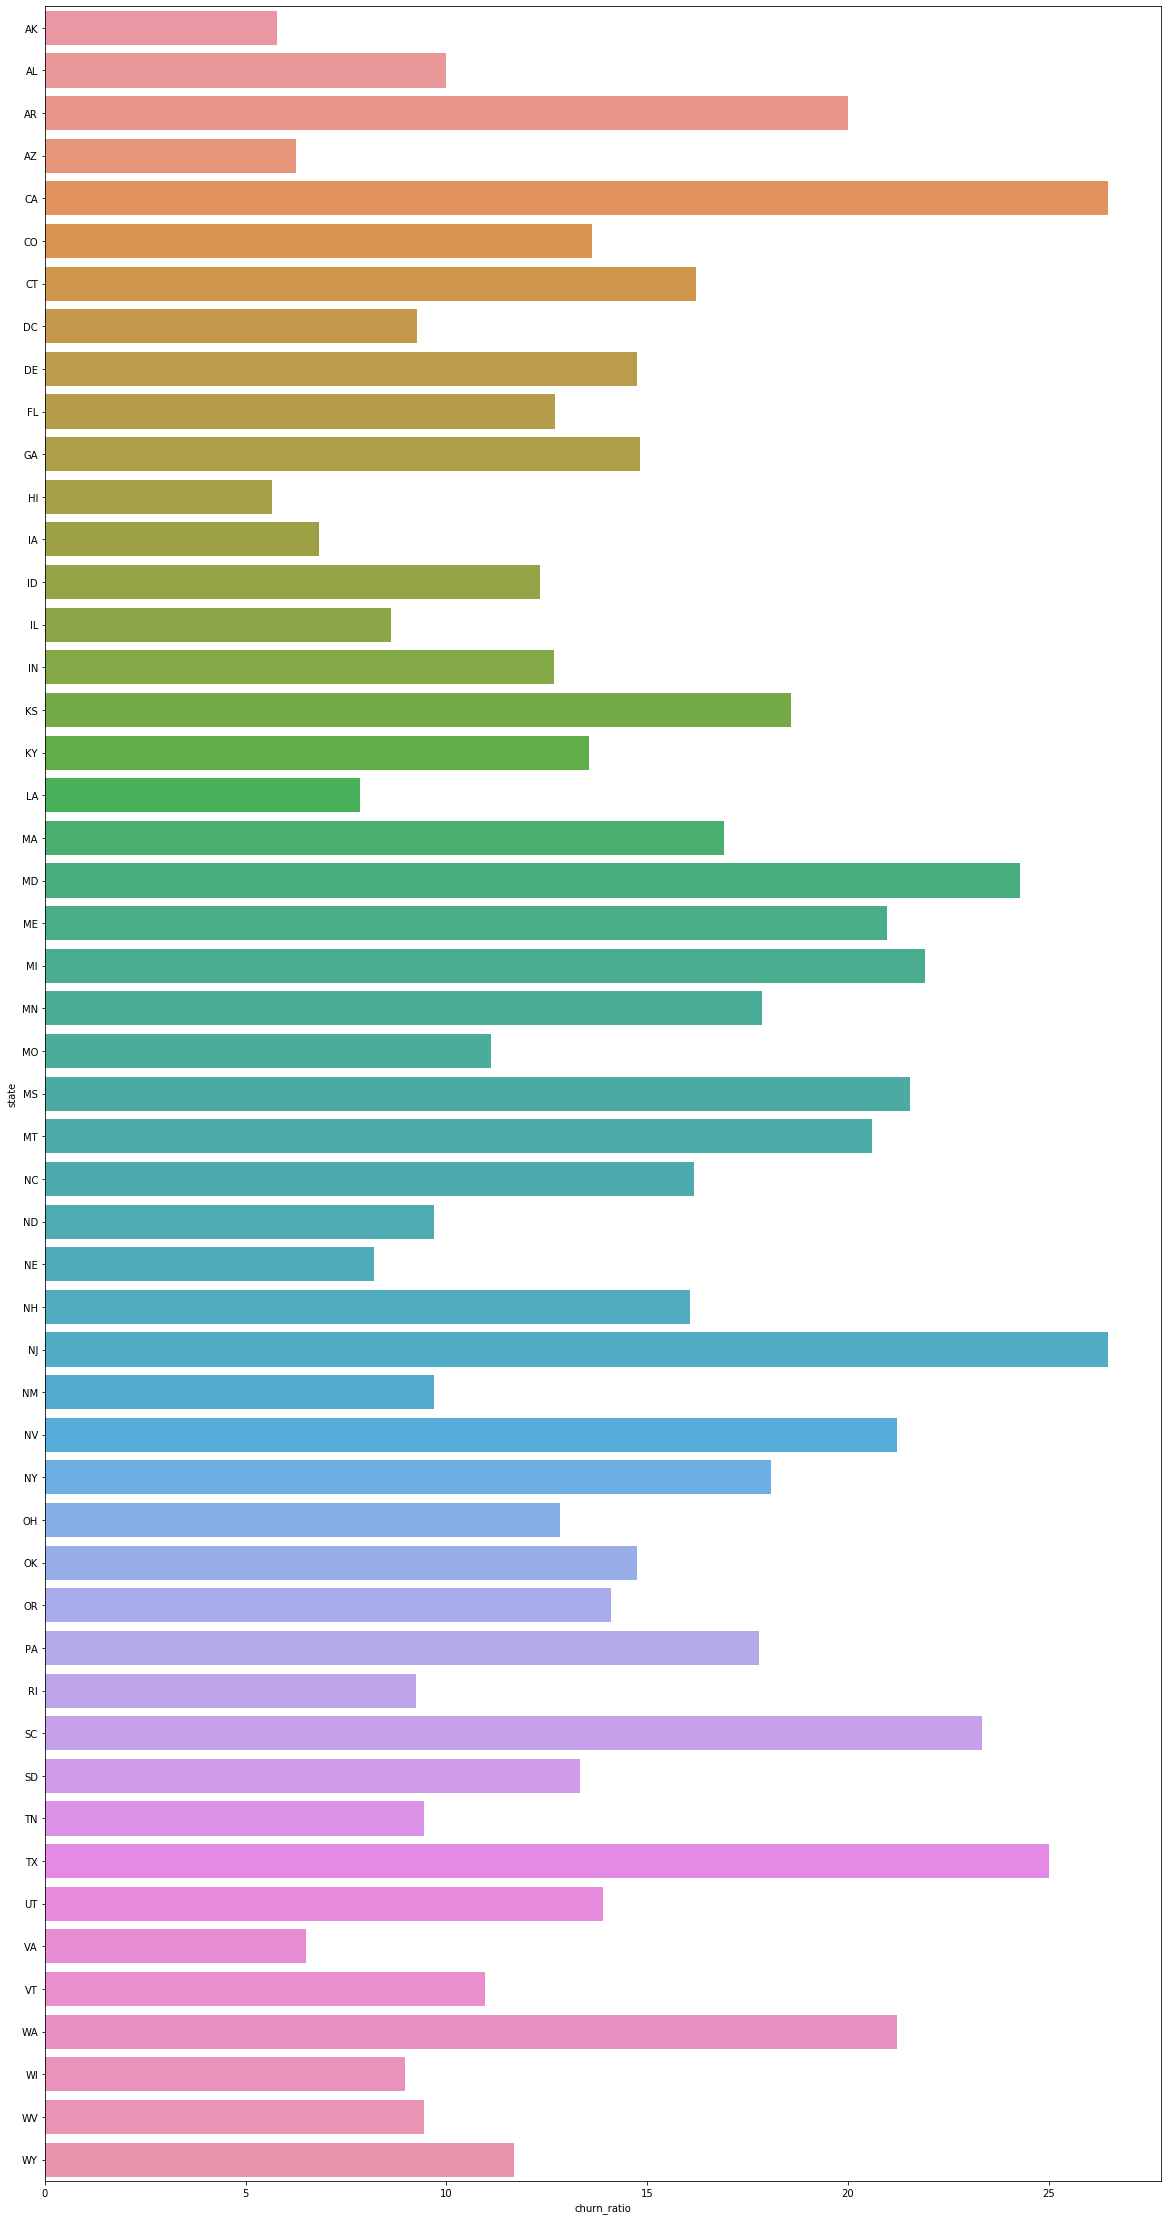

In [167]:
plt.subplots(figsize=(20,40))
sns.barplot(x="churn_ratio",y="state",data=c_df)

In [172]:
sortt=c_df.sort_values(by=["churn_ratio"])

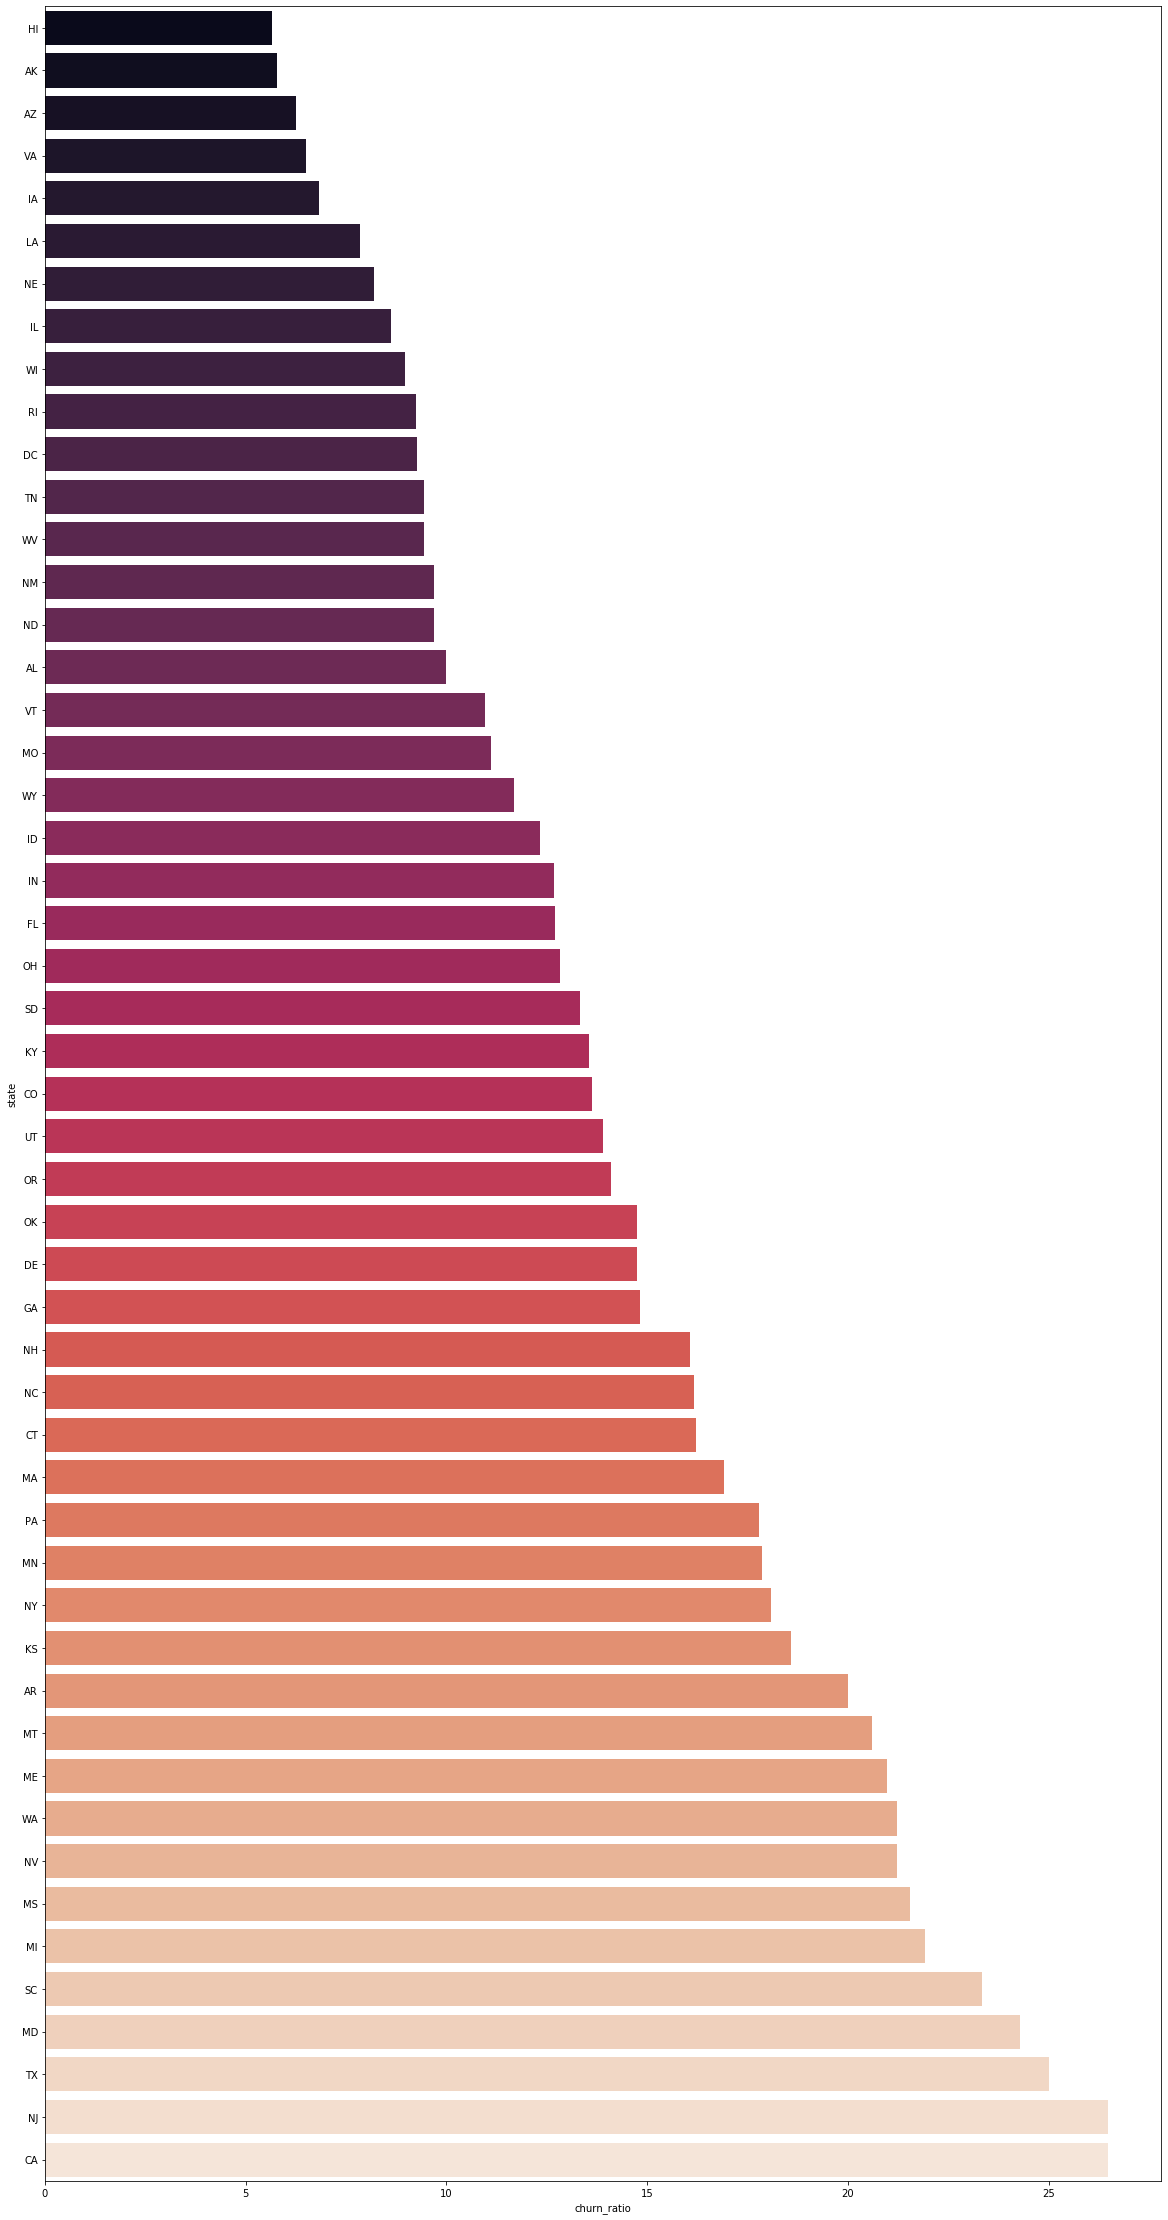

In [174]:
plt.subplots(figsize=(20,40))
sns.barplot(x="churn_ratio",y="state",data=sortt, palette="rocket")

In [183]:
ca_c=df[(df["state"]=="CA")&(df["churn"]==True)]

In [181]:
ca=df[df["state"]=="CA"]

In [179]:
print((ca_c.shape[0]/ca.shape[0])*100)

26.47058823529412


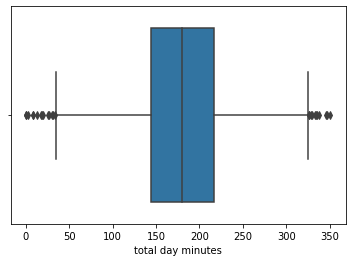

In [8]:
sns.boxplot(df["total day minutes"])# we can see outliers  

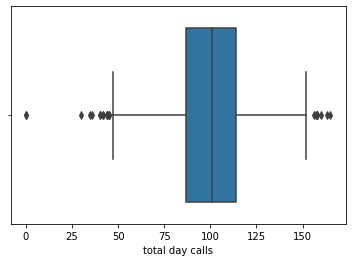

In [9]:
sns.boxplot(df["total day calls"])

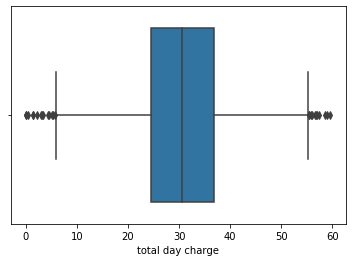

In [11]:
sns.boxplot(df["total day charge"])# we can see outliers  

In [12]:
minute_q1=df["total day minutes"].quantile(0.25)
minute_q2=df["total day minutes"].quantile(0.50)#median
minute_q3=df["total day minutes"].quantile(0.75)
minute_iqr=minute_q3-minute_q1
print(minute_q1)
print(minute_q2)
print(minute_q3)
print(minute_iqr)

143.7
179.4
216.4
72.70000000000002


In [13]:
high_threshold=minute_q3+(minute_iqr*1.5)
low_threshold=minute_q1-(minute_iqr*1.5)
print(high_threshold)
print(low_threshold)

325.45000000000005
34.64999999999996


In [17]:
high_out_df=df["total day minutes"]>high_threshold
df[high_out_df]#here are some of the outliers

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
156,OH,83,415,370-9116,no,no,0,337.4,120,57.36,...,116,19.33,153.9,114,6.93,15.8,7,4.27,0,True
197,TX,208,510,378-3625,no,no,0,326.5,67,55.51,...,113,14.99,181.7,102,8.18,10.7,6,2.89,2,True
365,CO,154,415,343-5709,no,no,0,350.8,75,59.64,...,94,18.40,253.9,100,11.43,10.1,9,2.73,1,True
605,MO,112,415,373-2053,no,no,0,335.5,77,57.04,...,109,18.06,265.0,132,11.93,12.7,8,3.43,2,True
975,DE,129,510,332-6181,no,no,0,334.3,118,56.83,...,104,16.33,191.0,83,8.59,10.4,6,2.81,0,True
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,...,79,21.21,275.4,102,12.39,13.3,9,3.59,1,True
1679,OK,82,510,393-4823,no,no,0,329.8,73,56.07,...,120,17.71,267.1,102,12.02,10.6,6,2.86,0,True
2028,SD,93,510,408-4836,no,no,0,328.1,106,55.78,...,89,12.89,303.5,114,13.66,8.7,3,2.35,1,True
2412,WI,89,415,373-4264,no,no,0,326.3,112,55.47,...,110,14.03,162.9,97,7.33,7.5,1,2.03,1,True


In [18]:
low_out_df=df["total day minutes"]<low_threshold
df[low_out_df]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
685,CO,63,415,408-4530,no,yes,32,30.9,113,5.25,...,113,15.90,230.8,101,10.39,8.6,7,2.32,1,False
741,NE,66,415,337-1225,no,no,0,34.0,133,5.78,...,61,23.68,129.6,120,5.83,11.5,3,3.11,0,False
1052,OR,98,415,378-6772,yes,no,0,12.5,67,2.13,...,90,21.81,169.4,88,7.62,7.7,9,2.08,1,False
1076,WY,53,415,337-4339,no,yes,27,25.9,119,4.40,...,96,17.55,228.1,64,10.26,6.5,7,1.76,1,False
1345,SD,98,415,392-2555,no,no,0,0.0,0,0.00,...,130,13.57,167.1,88,7.52,6.8,1,1.84,4,True
1397,VT,101,510,413-7655,no,no,0,0.0,0,0.00,...,119,16.33,168.8,95,7.60,7.2,4,1.94,1,False
1621,SC,138,510,370-9533,no,yes,21,19.5,149,3.32,...,109,11.98,179.7,111,8.09,7.9,1,2.13,0,False
1986,WI,70,415,405-9233,no,no,0,7.9,100,1.34,...,83,11.59,156.6,89,7.05,12.1,1,3.27,0,False
2124,KS,43,415,381-9367,no,no,0,27.0,117,4.59,...,97,13.68,279.5,96,12.58,10.7,3,2.89,3,False
2252,NH,148,408,333-7449,no,no,0,17.6,121,2.99,...,125,13.74,203.1,82,9.14,10.6,6,2.86,1,False


In [19]:
df[low_out_df].index

Int64Index([ 685,  741, 1052, 1076, 1345, 1397, 1621, 1986, 2124, 2252, 2736,
            2753, 3046, 3174],
           dtype='int64')

In [23]:
df["total day minutes"][high_out_df]=high_threshold
df["total day minutes"][low_out_df]=low_threshold

C:\Users\Alperen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Alperen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
df.iloc[685:686]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
685,CO,63,415,408-4530,no,yes,32,34.65,113,5.25,...,113,15.9,230.8,101,10.39,8.6,7,2.32,1,False


In [25]:
df.iloc[15:16]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
15,NY,161,415,351-7269,no,no,0,325.45,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
